# Exercise Steps 

1. Select a dataset, Make sure it's not too dirty, as this case study is about storytelling, not cleaning.
2. Pick your audience: executive, technical, or non-technical; and adjust your tone accordingly. 
3. Take a look at the data: explore it. 
4. Think of a narrative, and pursue it. 

In your quest, you might need to ask a bunch of other questions, such as: 
- Can I count something interesting? 
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)? 
- Can I make a bar plot or a histogram? 
- Can I compare two related quantities?
- Can I make a scatterplot? 
- Can I make a time-series plot? 
- Looking at the plots, what are some insights I can make? 
- Can I see any correlations? 
- Is there a hypothesis I can - and should - investigate further? 
- What other questions are the insights leading me to ask? 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np


In [2]:
df = pd.read_csv('./data/adult.csv')

**About Dataset** (from kaggle.com):

**Fields**:

- The dataset contains 16 columns
- Target filed: Income
-- The income is divide into two classes: <=50K and >50K
- Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

**Acknowledgements**:

This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

#### Feature Description
***(from: https://www.kaggle.com/code/alokevil/simple-eda-for-beginners)***

**1. Categorical Attributes**

***workclass***: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
> *Individual work category*

***education***: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
> Individual's highest education degree

***marital-status***: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
> Individual marital status

***occupation***: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
> Individual's occupation

***relationship***: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
> Individual's relation in a family

***race***: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
> Race of Individual

***sex***: Female, Male.

***native-country***: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
> Individual's native country


**2. Continuous Attributes**

***age***: continuous.
> Age of an individual

***fnlwgt***: final weight, continuous.
> The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

***capital-gain***: continuous.

***capital-loss***: continuous.

***hours-per-week***: continuous.
> Individual's working hour per week






## 1. Getting and inspect the data

In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,25,38,28,44,18,34,29,63,24,55
workclass,Private,Private,Local-gov,Private,?,Private,?,Self-emp-not-inc,Private,Private
fnlwgt,226802,89814,336951,160323,103497,198693,227026,104626,369667,104996
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th,HS-grad,Prof-school,Some-college,7th-8th
educational-num,7,9,12,10,10,6,9,15,10,4
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service,?,Prof-specialty,Other-service,Craft-repair
relationship,Own-child,Husband,Husband,Husband,Own-child,Not-in-family,Unmarried,Husband,Unmarried,Husband
race,Black,White,White,Black,White,White,Black,White,White,White
gender,Male,Male,Male,Male,Female,Male,Male,Male,Female,Male


There doesn't seem to be any null values in the dataset, but there are entries that contain a `?`. 

In [7]:
for col in df.columns:
    if '?' in df[col].unique().astype(str):
        print(col)

workclass
occupation
native-country


In [8]:
df[df.workclass == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


It seems the entries in the `workclass` column are '?' when the `occupation` column entires are '?'.

Let's verify this:

In [9]:
df[df.workclass == '?'].shape

(2799, 15)

In [10]:
df[(df.workclass == '?') & (df.occupation == '?')].shape

(2799, 15)

They are indeed the same entries.

In [11]:
round(100* (2799 / len(df)),2)

5.73

In [12]:
df[df['native-country'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [13]:
round( 100* 857/len(df),2)

1.75

Since the missing entries for `workclass` & `occupation` represent under 6% of the total dataset, we could drop them or impute them with the mode. Similarly, the entries for `native-country` are under 2%. I will opt for using the mode to fill the entries.

In [14]:
# first I'll replace the `?` entries with nan then I'll fill the na values with the mode.
df[df=='?'] = np.nan


In [15]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

## 2. Exploring

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


- The youngest and oldest ages in the dataframe are 17 and 90 respectively.
- The least educated and most educated leves are 1 : 'Preschool' and 16: 'Doctorate'
- The least and most amount of hours worked per week are ~ 12 and 99

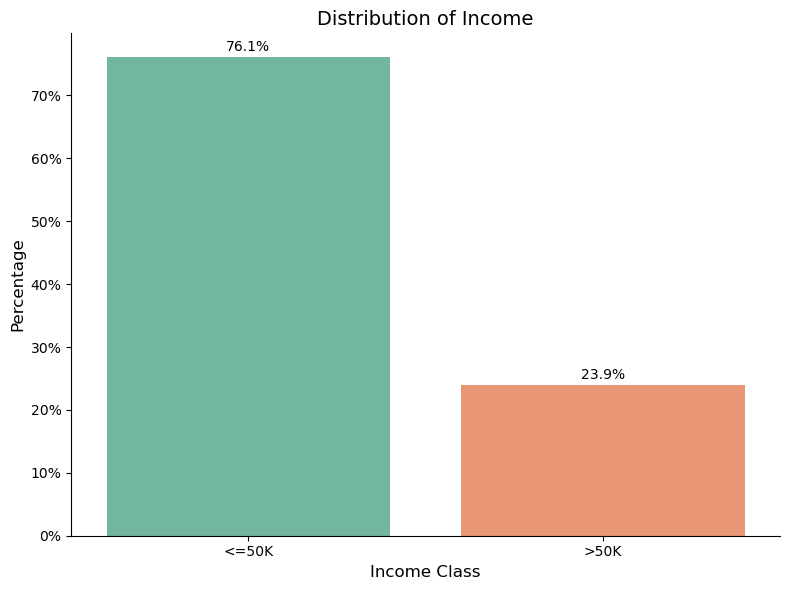

There are 3.2 times as many individuals making <=50K as there are making >50K.


In [17]:
from matplotlib.ticker import PercentFormatter
income_percentage = df['income'].value_counts(normalize=True) * 100
percent_less_50k = income_percentage['<=50K']
percent_greater_50k = income_percentage['>50K']

plt.figure(figsize=(8, 6))
sns.barplot(x=income_percentage.index, y=income_percentage.values, palette='Set2')

plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Distribution of Income', fontsize=14)

# Adding percentage labels on top of each bar
for i, v in enumerate(income_percentage.values):
    plt.text(i, v + 1, f'{v:.1f}%', color='black', ha='center', fontsize=10)

plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

ratio = percent_less_50k / percent_greater_50k
print(f"There are {ratio:.1f} times as many individuals making <=50K as there are making >50K.")

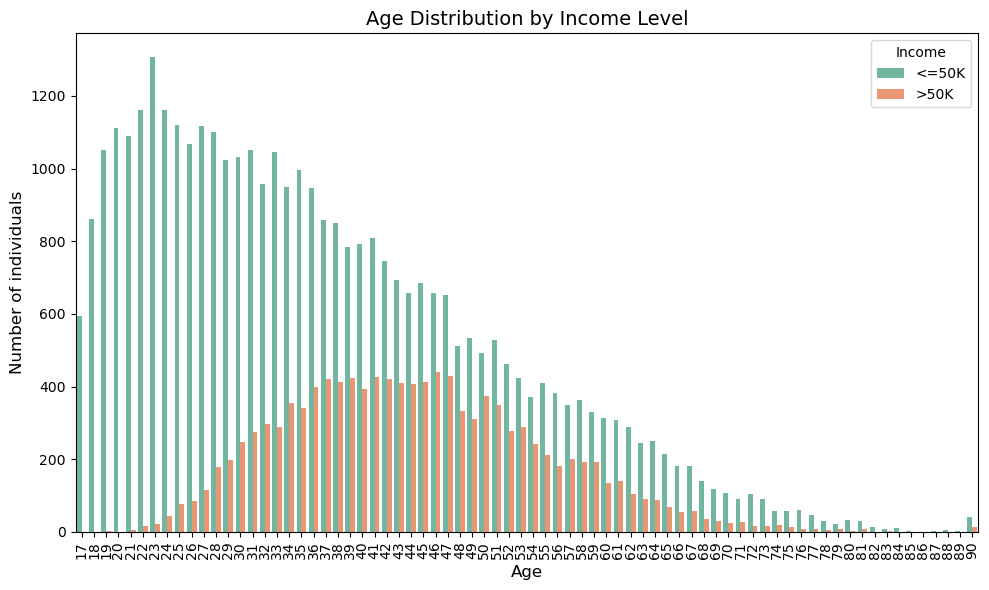

In [18]:
# Plot the age distribution by income level
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='income', data=df, palette="Set2")

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of individuals', fontsize=12)
plt.title('Age Distribution by Income Level', fontsize=14)

plt.legend(title='Income', loc='upper right')

plt.tight_layout()
plt.show()

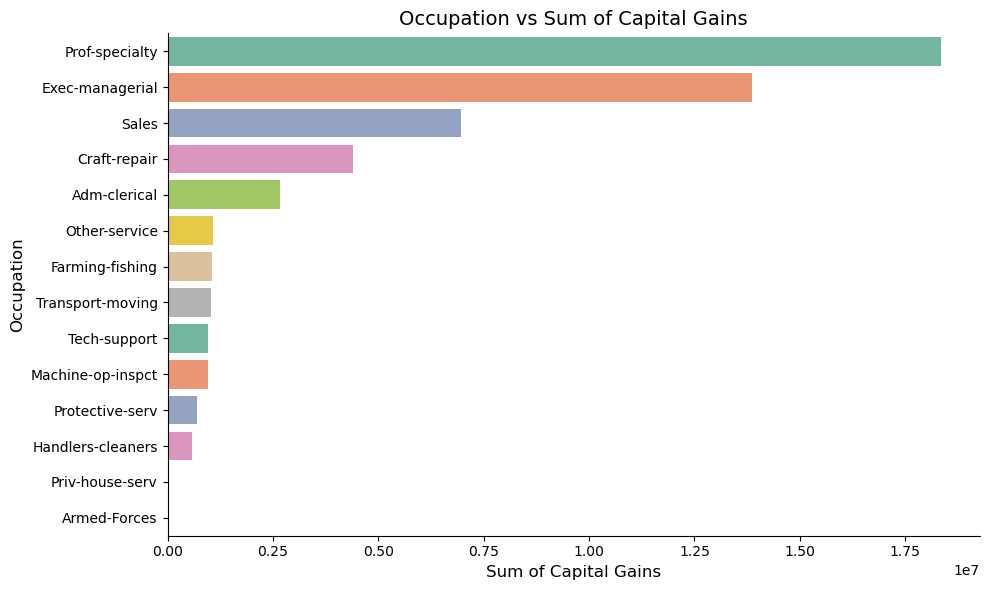

In [19]:
# Calculate the sum of capital gains by occupation and sort the data in descending order
occupation_capital_gain = df.groupby('occupation')['capital-gain'].sum().reset_index()
occupation_capital_gain = occupation_capital_gain.sort_values('capital-gain', ascending=False)

# Create the bar plot for occupation vs sum of capital gains
plt.figure(figsize=(10, 6))
sns.barplot(x='capital-gain', y='occupation', data=occupation_capital_gain, palette="Set2")
plt.xlabel('Sum of Capital Gains', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.title('Occupation vs Sum of Capital Gains', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

`Occupation`: *Prof-specialty* and *Exec-managerial* have noticeably higher `capital-gain`. Lets evaluate the remaining demographic attributes to income.

In [20]:
# Select the relevant demographic attributes and the target variable (income)
demographic_attributes = ['age', 'education', 'occupation', 'marital-status', 'educational-num', 'gender']
df_demographic = df[demographic_attributes + ['income']]

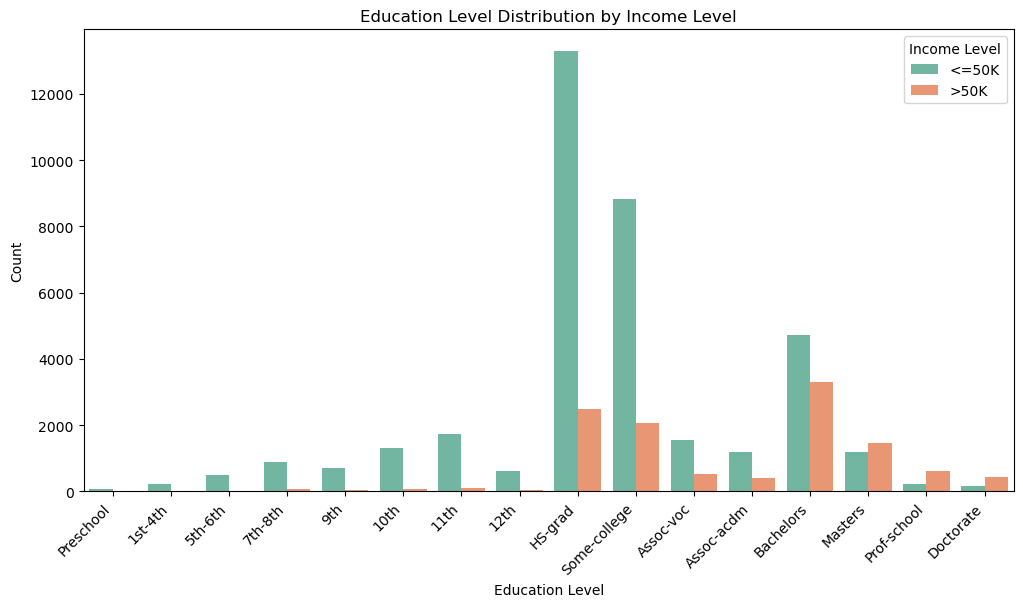

In [21]:
# Analyze education level distribution by income using bar plots
plt.figure(figsize=(12, 6))
education_order = df_demographic.groupby('education')['educational-num'].mean().sort_values().index
sns.countplot(x='education', hue='income', data=df_demographic, order=education_order, palette="Set2")
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution by Income Level')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Income Level', loc='upper right')
plt.show()

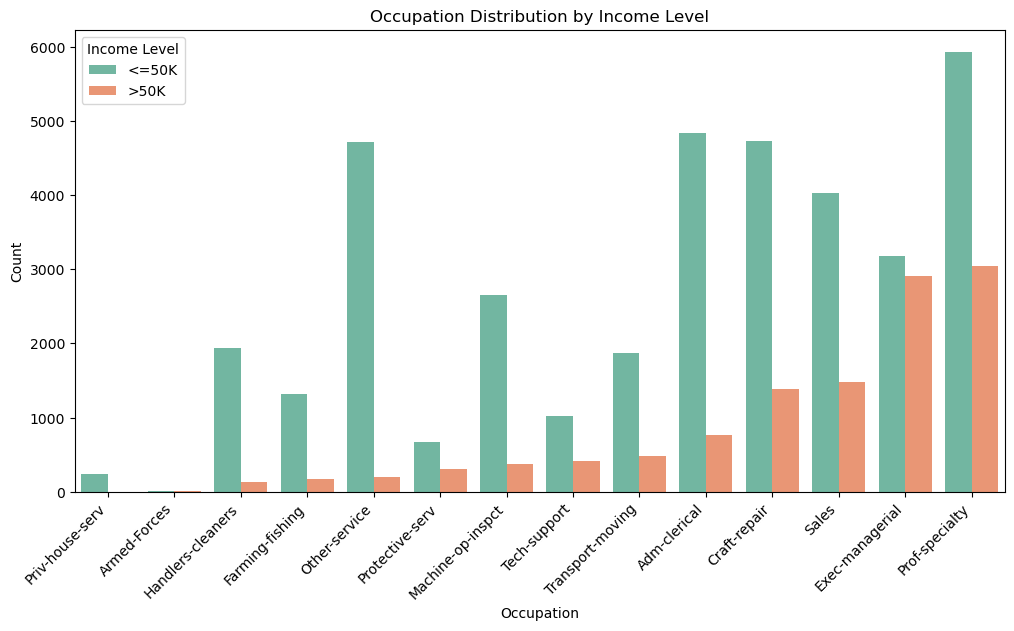

In [22]:
# Analyze occupation distribution by income using bar plots
plt.figure(figsize=(12, 6))
occupation_income = df_demographic[df_demographic['income'] == '>50K']['occupation'].value_counts().reset_index()
occupation_income.columns = ['occupation', 'count']
occupation_income = occupation_income.sort_values('count')
sns.countplot(x='occupation', hue='income', data=df_demographic, palette="Set2", order=occupation_income['occupation'])
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution by Income Level')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Income Level', loc='upper left')
plt.show()

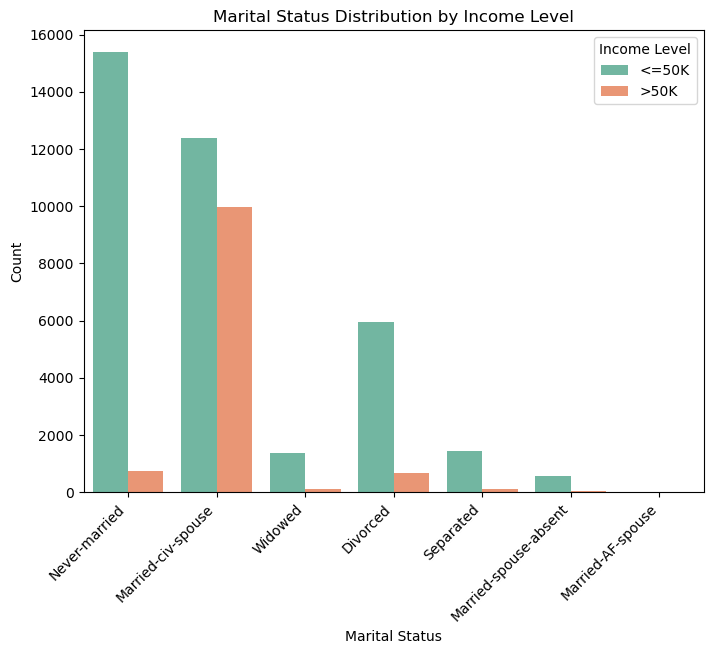

In [23]:
# Analyze marital status distribution by income using bar plots
plt.figure(figsize=(8, 6))
sns.countplot(x='marital-status', hue='income', data=df_demographic, palette="Set2")
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Income Level')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Income Level', loc='upper right')
plt.show()

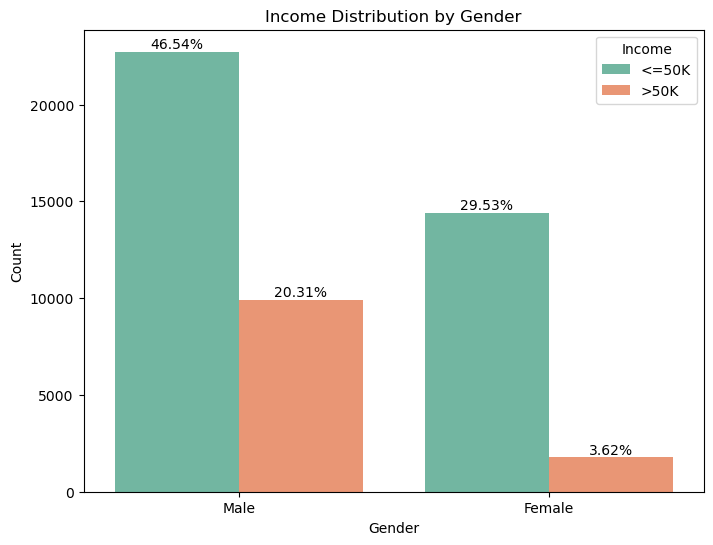

In [33]:
# Plot income distribution by gender using bar plots
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', hue='income', data=df_demographic, palette="Set2")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Income Distribution by Gender')
plt.legend(title='Income', loc='upper right')

# Calculate income distribution by gender as percentages
gender_income_counts = df_demographic.groupby('gender')['income'].value_counts(normalize=True) * 100

# Iterate over the bars and add percentage labels
total_height = df_demographic.shape[0]
for p in ax.patches:
    percentage = f"{p.get_height() / total_height * 100:.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


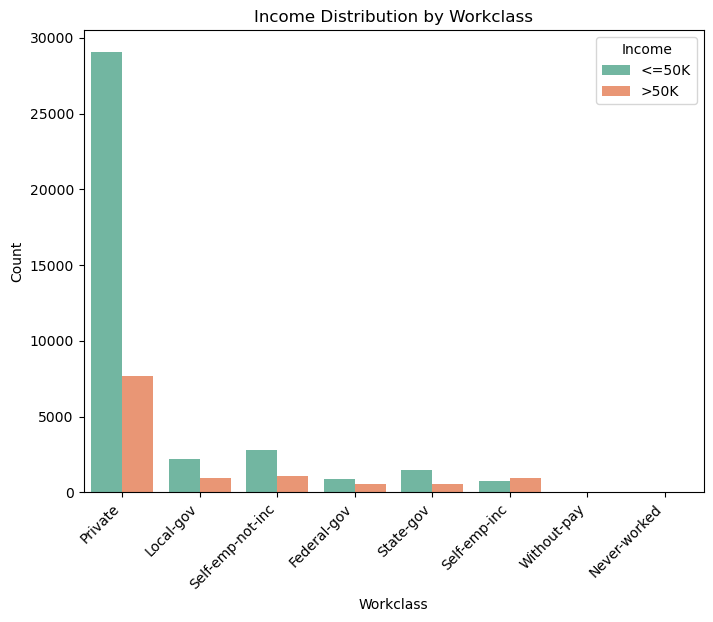

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='workclass', hue='income', data=df, palette="Set2")
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Income Distribution by Workclass')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right')
plt.show()


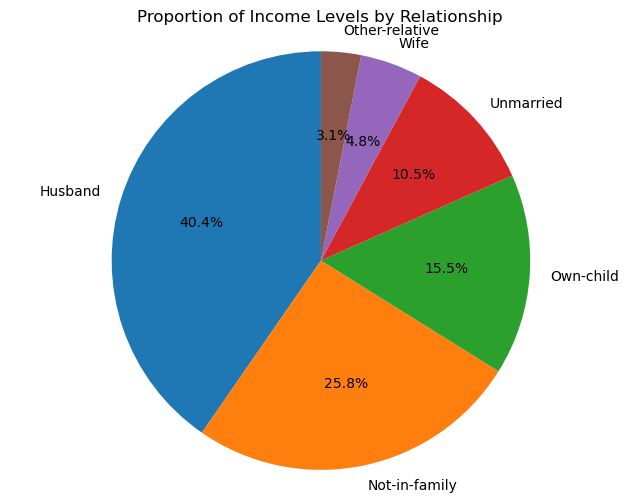

In [46]:
plt.figure(figsize=(8, 6))
df_relationship = df['relationship'].value_counts()
plt.pie(df_relationship, labels=df_relationship.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Income Levels by Relationship')
plt.axis('equal')
plt.show()

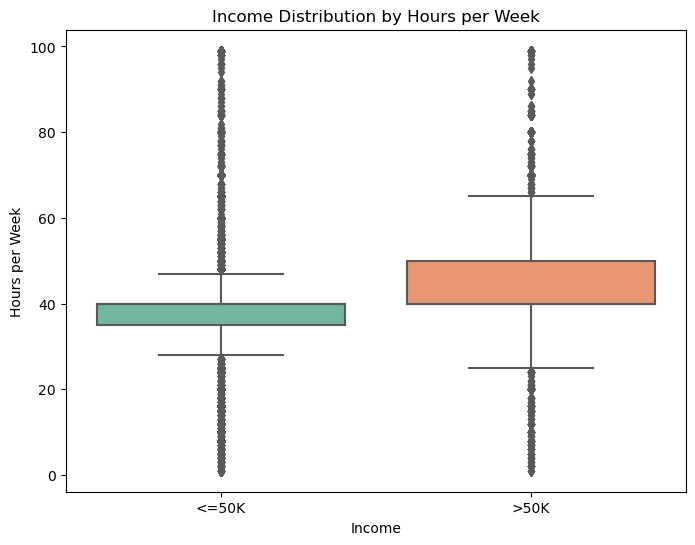

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df, palette="Set2")
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.title('Income Distribution by Hours per Week')
plt.show()


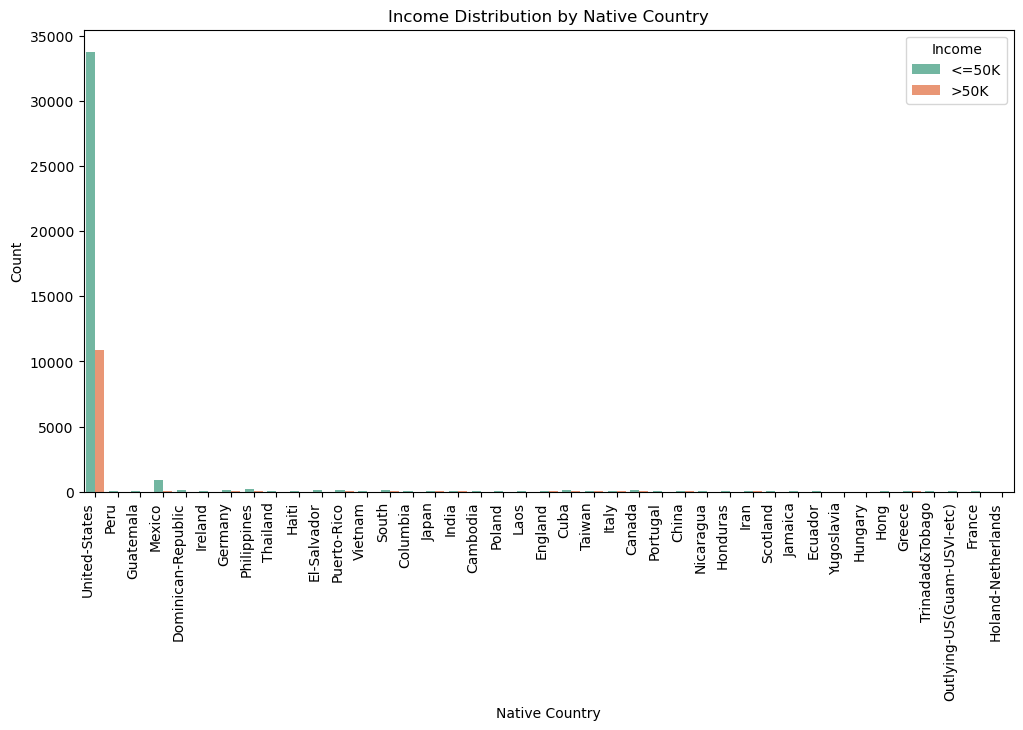

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x='native-country', hue='income', data=df, palette="Set2")
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Income Distribution by Native Country')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Income', loc='upper right')
plt.show()


## 3. Preprocessing